<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2019/blob/master/NLP_NER_Pharmacovigilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import glob

mylist = [f for f in glob.glob("*.json")]
final_df = pd.DataFrame()

In [0]:
l=0
for filename in mylist:
  x=filename.split('-')[-1].split('.')[0]
  with open(filename, 'r') as f:
    datastore = json.load(f)
    sentences=json_normalize(data=datastore['sentences'], record_path=['tokens'])
    mentions=json_normalize(datastore['mentions'])[['begin','end','type']]
    mentions['type']='I-'+mentions['type']
    j=mentions
    k='whiteSpace'
    for i in range(len(mentions)):
      sentences.loc[(sentences['end']>j.iloc[i,0]) & (sentences['end']<=j.iloc[i,1])
                    , k] = j.iloc[i,2]
  
  
    sentences.loc[(sentences.whiteSpace==False) , 'whiteSpace'] = 'O'
    sentences.id=x+sentences.id.str.replace('-t[0-9]+', '')
    ## Delete References
    a=sentences[sentences.text.str.upper()=='REFERENCES']
    ## Handle Documents without references
    if a.empty:
      a=sentences.iloc[-1,1]
    else:
      a=a.iloc[0,1]

    final_df=final_df.append(sentences[(sentences.end)<a])
    
final_df.reset_index(inplace=True)

In [0]:
final_df.loc[(final_df.whiteSpace=='I-AuthorNameInVancouver') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-AgeGroupOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterFaxNumber') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterAltPhone') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterPostalCode') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterState') , 'whiteSpace'] = 'O'

final_df.loc[(final_df.whiteSpace=='I-RaceOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterSalutation') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterSuffix') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-PageOfPublication') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='I-ReporterPhoneNumber') , 'whiteSpace'] = 'O'

In [0]:
#EDA
#final_df[(final_df.text=='Ibuprofen')]
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')].text.str.lower().value_counts(sort=True)
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')&((final_df.text=='olanza')|(final_df.text=='pine')|(final_df.text=='-'))]
#final_df[(final_df.whiteSpace=='I-SuspectedProductName')].text.str.lower().unique()
final_df[(final_df.text.isin(['ibuprofen','olanzapine','clozapine',
                              'fluoxetine','atorvastatin','quetiapine']))].whiteSpace.value_counts(sort=True)

O                         479
I-SuspectedProductName    291
I-ArticleTitle              2
I-JournalName               1
Name: whiteSpace, dtype: int64

In [0]:
final_df[(final_df.whiteSpace=='I-ReportedIndication')].text.str.lower().unique()#.value_counts(sort=True)

array(['vasculitis', 'hyperlipidemia', 'schizophrenia', 'increased',
       'agitation', 'yelling', 'bipolar', 'disorder', 'manic', 'episodes',
       'recurrent', 'episode', 'hypercholesterolemia', 'schizophrenic',
       'generalized', 'anxiety', 'severe', 'toothache', 'behavioral',
       'and', 'psychological', 'symptoms', 'of', 'dementia',
       'disorientation', 'insomnia', 'low', 'back', 'pain', 'management',
       'delirium', 'chemotherapy', 'induced', 'nausea', 'vomiting',
       'onset', 'the', 'appeared', 'to', 'be', 'temporally', 'related',
       'commencing', 'treatment', 'with', 'enzalutamide', 'paranoid',
       'other', 'disorders', 'depression', 'ear', 'psychosis',
       'dyslipidemic', 'treatment-resistant', 'residual',
       'treatmentresistant', 'persistent', 'delusional', 'aggression',
       ',', 'impulsivity', 'hyperactivity', 'major', 'depressive',
       'analgesic', 'antipyretic', 'eye', 'fever', 'arthralgias',
       'moderate', '(', ')', 'flu-like', 'cy

In [0]:
#final_df[(final_df.whiteSpace=='I-YearOfPublication')].text.str.lower().value_counts(sort=True)
final_df[(final_df.whiteSpace=='I-YearOfPublication')&(final_df.text.isin(['1','2','5','0',':']))]

,index,begin,end,id,text,whiteSpace
55112,33,66,67,23s0,2,I-YearOfPublication
55113,34,68,69,23s0,0,I-YearOfPublication
55114,35,70,71,23s0,1,I-YearOfPublication
55115,36,72,73,23s0,5,I-YearOfPublication
82950,11,91,92,30s3,:,I-YearOfPublication


In [0]:
final_df.loc[(final_df.text=='ibuprofen')|
         (final_df.text=='olanzapine')|
         (final_df.text=='clozapine')|
         (final_df.text=='fluoxetine')|
         (final_df.text=='atorvastatin')|
         (final_df.text=='quetiapine'),'whiteSpace']='I-SuspectedProductName'

#final_df.loc[(final_df.whiteSpace=='I-ReportedIndication')&
#         (final_df['text'].isin(['a','from','be','with','(',')',
#                                 'management','of','other','and','the','to','in'])),'whiteSpace']='O'

In [0]:
final_df.drop("index", axis=1, inplace=True)
final_df.drop("begin", axis=1, inplace=True)
final_df.drop("end", axis=1, inplace=True)

In [0]:
final_df.columns = ['doc_id', 'words','tags']

In [0]:
final_df['doc_id1'], _ = final_df['doc_id'].str.split('s', 1).str
cols = ['doc_id', 'doc_id1','words','tags']
final_df = final_df[cols]
final_df.head()

,doc_id,doc_id1,words,tags
0,13s0,13,Short,O
1,13s0,13,Communication,O
2,13s1,13,Atorvastatin,I-ArticleTitle
3,13s1,13,Induced,I-ArticleTitle
4,13s1,13,Vasculitis,I-ArticleTitle


In [0]:
import random
random.seed( 30 )

lst=list(range(50))
random.shuffle(lst)
trn_lst=lst[0:int(len(lst)*0.6)]
val_lst=lst[int(len(lst)*0.6):int(len(lst)*0.8)]
tst_lst=lst[int(len(lst)*0.8):]


trn_lst = list( map(str, trn_lst) )
val_lst = list( map(str, val_lst) )
tst_lst = list( map(str, tst_lst) )


train=final_df[(final_df.doc_id1.isin(trn_lst))]
valid=final_df[(final_df.doc_id1.isin(val_lst))]
test=final_df[(final_df.doc_id1.isin(tst_lst))]

#train[['words','tags']].to_csv('train.txt',index=False, sep='\t',header=False)
#valid[['words','tags']].to_csv('dev.txt',index=False, sep='\t',header=False)
#test[['words','tags']].to_csv('test.txt',index=False, sep='\t',header=False)

In [0]:
docs=['9','20','24','39','44']
test=final_df[(final_df.doc_id1.isin(docs))]
train=final_df[~(final_df.doc_id1.isin(docs))]

In [0]:
#!git clone https://github.com/Hironsan/anago.git

In [0]:
from tqdm import tqdm, trange

class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                           s["tags"].values.tolist())]
        self.grouped = self.data.groupby("doc_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

def get_sent(final_df):
  getter = SentenceGetter(final_df)
  data = []
  for i, doc in enumerate(getter.sentences):

      # Obtain the list of tokens in the document
      tokens = [t for t, tags in doc]

      # Perform POS tagging
      tagged = nltk.pos_tag(tokens)

      # Take the word, POS tag, and its label
      data.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])
  return data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
train_sent=get_sent(train)
test_sent=get_sent(test)

In [0]:
def word2features(doc, i):
    word = doc[i][0]
    postag = doc[i][1]

    # Common features for all words
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag
    ]

    # Features for words that are not
    # at the beginning of a document
    if i > 0:
        word1 = doc[i-1][0]
        postag1 = doc[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:word.isdigit=%s' % word1.isdigit(),
            '-1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'beginning of a document'
        features.append('BOS')

    # Features for words that are not
    # at the end of a document
    if i < len(doc)-1:
        word1 = doc[i+1][0]
        postag1 = doc[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:word.isdigit=%s' % word1.isdigit(),
            '+1:postag=' + postag1
        ])
    else:
        # Indicate that it is the 'end of a document'
        features.append('EOS')

    return features

In [0]:
#from sklearn.model_selection import train_test_split

# A function for extracting features in documents
def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

# A function fo generating the list of labels for each document
def get_labels(doc):
    return [label for (token, postag, label) in doc]

X_train = [extract_features(doc) for doc in train_sent]
X_test = [extract_features(doc) for doc in test_sent]

y_train = [get_labels(doc) for doc in train_sent]
y_test = [get_labels(doc) for doc in test_sent]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
def create_list_of_list(b,c):
 a=[]
 for j in range(len(b[0])):
   lst=''
   for i in b[j]:
    lst=lst+i[c]+"|"
   a.append(list((lst[:-1]).split("|")))  
 return a 
 

In [0]:
x_train=create_list_of_list(train_sent,0)
y_train=create_list_of_list(train_sent,2)
x_test=create_list_of_list(test_sent,0)
y_test=create_list_of_list(test_sent,2)

In [0]:
train_sent=get_sent(train)
test_sent=get_sent(test)
valid_sent=get_sent(valid)

def tuple_list_to_dataframe(b):
 a = pd.DataFrame()
 for i in range(len(b)):
   a=pd.concat([a,pd.DataFrame(b[i])])
 
 return a
  
  
train=tuple_list_to_dataframe(train_sent)
test=tuple_list_to_dataframe(test_sent)
valid=tuple_list_to_dataframe(valid_sent)

In [0]:
train.to_csv('train.txt',index=False, sep=' ',header=False)
valid.to_csv('dev.txt',index=False, sep=' ',header=False)
test.to_csv('test.txt',index=False, sep=' ',header=False)

##import numpy as np
#np.savetxt("train.csv", train_sent, delimiter=",", fmt='%s')
#print(train)

In [0]:
!sed -i 's/\. \. O/\. \. O\n\n/g' train.txt
!sed -i 's/\. \. O/\. \. O\n\n/g' dev.txt
!sed -i 's/\. \. O/\. \. O\n\n/g' test.txt

In [0]:
!pip install python-crfsuite

In [0]:
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=False)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1,

    # coefficient for L2 penalty
    'c2': 0.01,  

    # maximum number of iterations
    'max_iterations': 200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')


In [0]:
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]

# Let's take a look at a random sample in the testing set
i = 12
for x, y in zip(y_pred[i], [x[1].split("=")[1] for x in X_test[i]]):
    print("%s (%s)" % (y, x))

atorvastatin (O)
- (O)
induced (O)
pancreatitis (O)
samir (O)
prajapati (O)
, (O)
samidh (O)
shah (O)
, (O)
chetna (I-ReporterAddress)
desai (I-ReporterAddress)
, (I-ReporterAddress)
mira (I-ReporterAddress)
desai (I-ReporterAddress)
, (O)
r.k. (O)
dikshit (O)


In [0]:
import numpy as np
from sklearn.metrics import classification_report

# Create a mapping of labels to indices
tags_vals = list(set(final_df["tags"].values))
labels = {t: i for i, t in enumerate(tags_vals)}
# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels[tag] for row in y_pred for tag in row])
truths = np.array([labels[tag] for row in y_test for tag in row])

In [0]:
a=tags_vals

In [0]:
print(classification_report(truths, predictions,target_names=a))

                        precision    recall  f1-score   support

       I-ReporterMName       0.00      0.00      0.00         2
     I-ReporterCountry       0.88      0.70      0.78        10
       I-ReporterFName       0.43      0.15      0.22        20
  I-ReporterDepartment       0.63      0.87      0.73        30
    I-AgeUnitOfPatient       1.00      0.92      0.96        13
         I-JournalName       0.91      0.26      0.41        38
        I-ReporterCity       0.33      0.05      0.09        19
  I-ReportedIndication       0.07      0.03      0.05        30
I-SuspectedProductName       0.95      0.96      0.96        82
        I-ArticleTitle       0.69      0.67      0.68        54
 I-VolumeOfPublication       1.00      0.30      0.47        23
     I-ReporterAddress       0.30      0.15      0.20        20
I-ReporterEmailAddress       1.00      0.90      0.95        10
 I-ReporterInstitution       0.70      0.80      0.75        35
        I-AgeOfPatient       1.00      

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(truths, predictions)

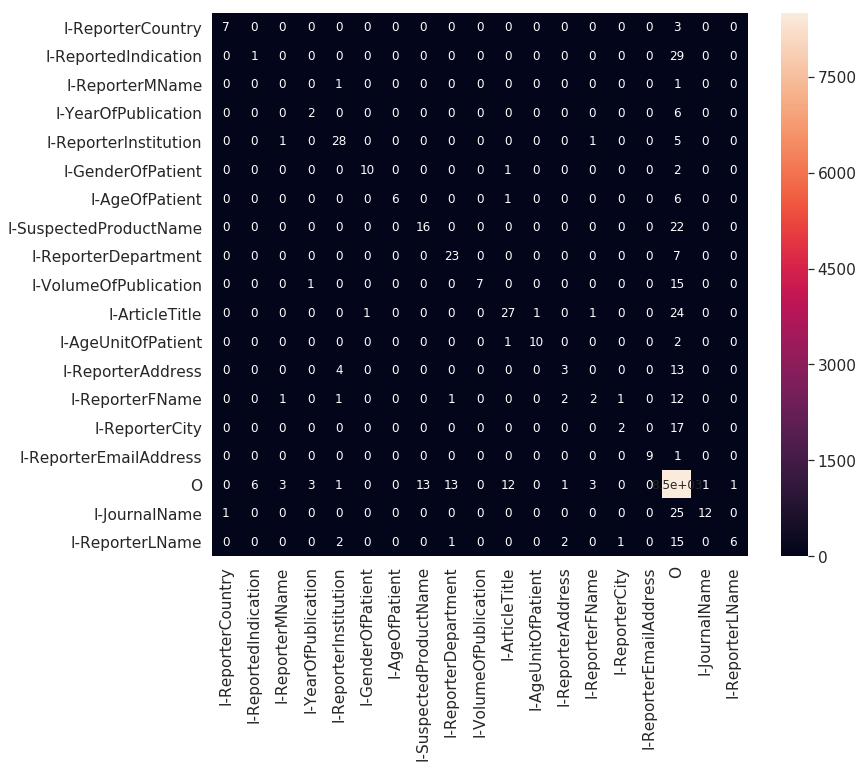

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
        
df_cm = pd.DataFrame(cm, a, a)
plt.figure(figsize = (12,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

In [0]:
!pip install sklearn_crfsuite

In [0]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics


crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.05,
    max_iterations=200,
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.05,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=200,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [0]:
y_pred = crf.predict(X_test)
labels = list(crf.classes_)
labels.remove('O') # remove 'O' label from evaluation
sorted_labels = sorted(labels,key=lambda name: (name[1:], name[0])) # group B and I results
print(sklearn_crfsuite.metrics.flat_classification_report(y_test, y_pred, labels=sorted_labels, digits=3))

                        precision    recall  f1-score   support

        I-AgeOfPatient      1.000     0.538     0.700        13
    I-AgeUnitOfPatient      1.000     0.923     0.960        13
        I-ArticleTitle      0.686     0.648     0.667        54
     I-GenderOfPatient      1.000     0.769     0.870        13
         I-JournalName      1.000     0.211     0.348        38
  I-ReportedIndication      0.333     0.067     0.111        30
     I-ReporterAddress      1.000     0.150     0.261        20
        I-ReporterCity      0.500     0.105     0.174        19
     I-ReporterCountry      0.889     0.800     0.842        10
  I-ReporterDepartment      0.667     0.867     0.754        30
I-ReporterEmailAddress      1.000     0.900     0.947        10
       I-ReporterFName      0.429     0.150     0.222        20
 I-ReporterInstitution      0.857     0.686     0.762        35
       I-ReporterLName      0.857     0.222     0.353        27
       I-ReporterMName      0.000     0

In [0]:
import scipy
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV


crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    max_iterations=100,
    all_possible_transitions=True
)
params_space = {
    'c1': scipy.stats.expon(scale=0.5),
    'c2': scipy.stats.expon(scale=0.05),
}

# use the same metric for evaluation
f1_scorer = make_scorer(metrics.flat_f1_score,
                        average='weighted', labels=labels)

# search
rs = RandomizedSearchCV(crf, params_space,
                        cv=3,
                        verbose=1,
                        n_jobs=-1,
                        n_iter=50,
                        scoring=f1_scorer)
rs.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))


best params: {'c1': 0.679376799768718, 'c2': 0.0424220238901698}
best CV score: 0.5572117465768939
model size: 0.22M


In [0]:
crf = rs.best_estimator_
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))


                        precision    recall  f1-score   support

        I-AgeOfPatient      0.857     0.462     0.600        13
    I-AgeUnitOfPatient      0.909     0.769     0.833        13
        I-ArticleTitle      0.571     0.370     0.449        54
     I-GenderOfPatient      1.000     0.846     0.917        13
         I-JournalName      0.562     0.237     0.333        38
  I-ReportedIndication      0.000     0.000     0.000        30
     I-ReporterAddress      0.000     0.000     0.000        20
        I-ReporterCity      0.500     0.105     0.174        19
     I-ReporterCountry      1.000     0.400     0.571        10
  I-ReporterDepartment      0.634     0.867     0.732        30
I-ReporterEmailAddress      1.000     0.900     0.947        10
       I-ReporterFName      0.429     0.150     0.222        20
 I-ReporterInstitution      0.844     0.771     0.806        35
       I-ReporterLName      0.875     0.259     0.400        27
       I-ReporterMName      0.000     0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
def get_sent1(final_df):
  getter = SentenceGetter(final_df)
  data = []
  for i, doc in enumerate(getter.sentences):

      # Obtain the list of tokens in the document
      tokens = [t for t, tags in doc]

      # Perform POS tagging
      #tagged = nltk.pos_tag(tokens)

      # Take the word, POS tag, and its label
      data.append([(w, label) for (w, label)  in doc])
  return data

In [0]:
test1=get_sent1(test)
train1=get_sent1(train)

In [0]:
import pickle
with open('test1.pkl', 'wb') as f:
 pickle.dump(test1, f)
with open('train1.pkl', 'wb') as f:
 pickle.dump(train1, f)


In [0]:
train.loc[train.words=='sulindac']

,doc_id,doc_id1,words,tags
62774,10s103,10,sulindac,O
62793,10s103,10,sulindac,O
